In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('timedata.csv')

data['Yearmonth'] = pd.to_datetime(data['Yearmonth'])

data['Year'] = data['Yearmonth'].dt.year
data['Month'] = data['Yearmonth'].dt.month

average = data.groupby(['Year', 'Month'])['label'].mean().reset_index()
average.rename(columns={'label': 'average'}, inplace=True)

average['Date'] = pd.to_datetime(average[['Year', 'Month']].assign(day=1))

average.drop(['Year', 'Month'], axis=1, inplace=True)
print(average)

      average       Date
0    1.000000 2008-01-01
1    1.000000 2008-02-01
2    1.000000 2008-03-01
3    0.883117 2008-04-01
4    0.892157 2008-05-01
..        ...        ...
127  0.847482 2018-08-01
128  0.863241 2018-09-01
129  0.858787 2018-10-01
130  0.836096 2018-11-01
131  0.843188 2018-12-01

[132 rows x 2 columns]


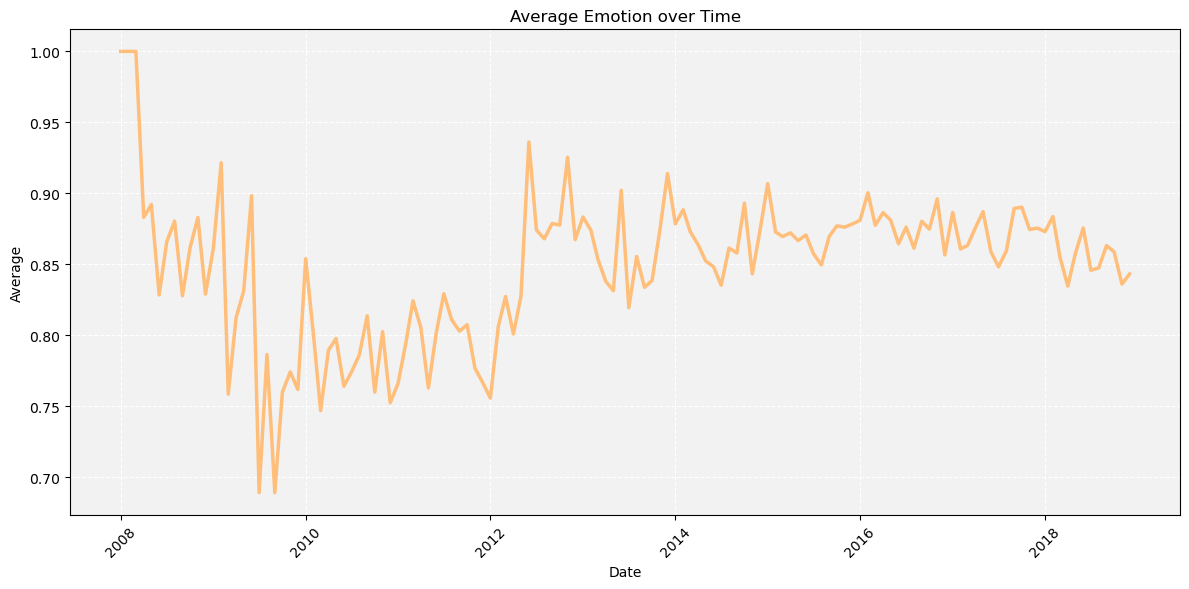

In [6]:
plt.figure(figsize=(12, 6))
color3='#FFBE7A'
plt.rcParams['axes.facecolor'] = '#99999920'
plt.grid(color='white', linestyle='--')
plt.plot(average['Date'], average['average'],color=color3,linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Average')
plt.title('Average Emotion over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
average_diff = average['average'].diff().dropna()

In [8]:
result = adfuller(average_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.944275732507654
p-value: 2.6146115820384752e-17


In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(average_diff, lags=None, boxpierce=False, 
               model_df=0, period=None, 
               return_df=True, auto_lag=False)

,lb_stat,lb_pvalue
1,29.874917,4.608361e-08
2,30.272497,2.669383e-07
3,30.582428,1.040754e-06
4,33.014034,1.186604e-06
5,34.670357,1.750633e-06
6,34.675554,4.980260e-06
7,34.729705,1.257137e-05
8,34.744332,2.976293e-05
9,34.745356,6.607015e-05
10,36.210987,7.742929e-05


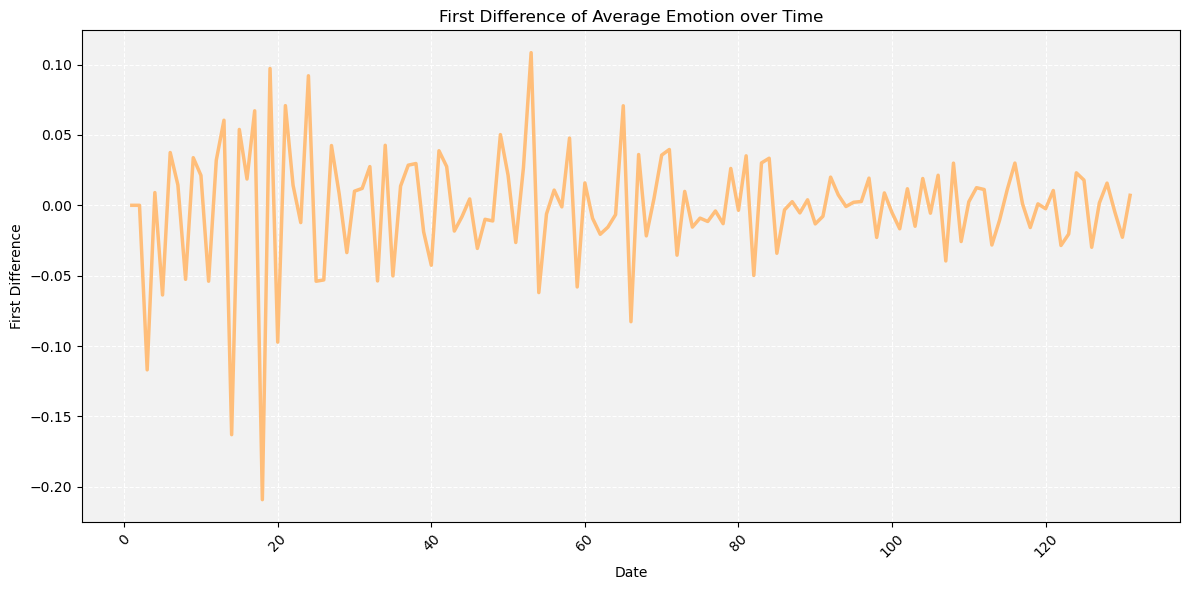

In [10]:
#差分后序列绘制时间序列图
plt.figure(figsize=(12, 6))
color3='#FFBE7A'
plt.rcParams['axes.facecolor'] = '#99999920'
plt.grid(color='white', linestyle='--')
plt.plot(average_diff.index, average_diff,color=color3,linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.title('First Difference of Average Emotion over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

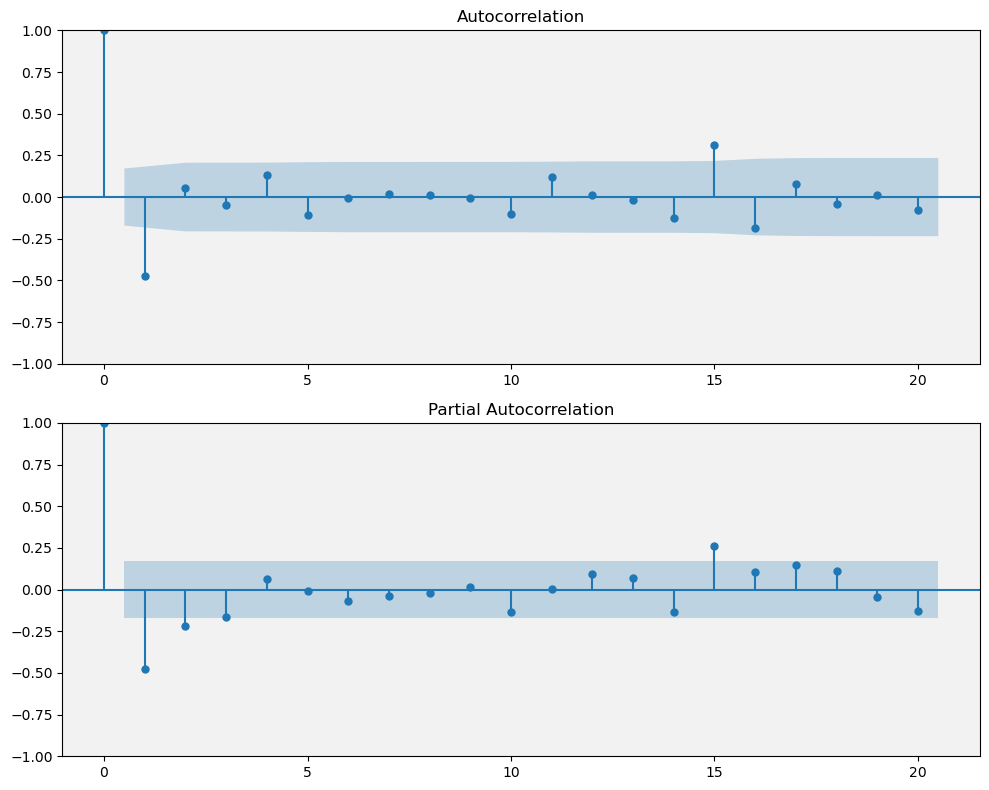

In [17]:
plt.rcParams['axes.facecolor'] = '#99999920'

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(average_diff, lags=20, ax=axes[0])
plot_pacf(average_diff, lags=20, ax=axes[1])
plt.tight_layout()
plt.show()

In [18]:
model = pm.auto_arima(average_diff, seasonal=False)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 249.194
Date:                Fri, 28 Apr 2023   AIC                           -494.389
Time:                        00:20:46   BIC                           -488.638
Sample:                             0   HQIC                          -492.052
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5758      0.064     -9.006      0.000      -0.701      -0.450
sigma2         0.0013   8.57e-05     15.158      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.16   Jarque-

In [19]:
import statsmodels.api as sm

# 模型残差
residuals = model.resid()

# 对残差序列做Ljung-Box检验
lb_test = sm.stats.acorr_ljungbox(residuals)
print(lb_test)

     lb_stat  lb_pvalue
1   0.149814   0.698713
2   0.470904   0.790213
3   0.519885   0.914501
4   2.135354   0.710880
5   3.093505   0.685573
6   3.337144   0.765496
7   3.337300   0.852146
8   3.337490   0.911430
9   3.460038   0.943240
10  3.994184   0.947609


In [20]:
import statsmodels.api as sm

In [21]:
model = sm.tsa.arima.ARIMA(average_diff, order=(0,0,1))  
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                average   No. Observations:                  131
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 249.476
Date:                Fri, 28 Apr 2023   AIC                           -492.952
Time:                        00:20:48   BIC                           -484.327
Sample:                             0   HQIC                          -489.447
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.001     -0.700      0.484      -0.004       0.002
ma.L1         -0.5796      0.064     -9.084      0.000      -0.705      -0.455
sigma2         0.0013   9.06e-05     14.277      0.0

C:\Users\TracyCui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TracyCui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TracyCui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
model_fit = model.fit()

In [23]:
print(model_fit)

In [24]:
yhat = model_fit.predict(0, 60, typ='levels')
print(yhat)

1    -0.001011
2    -0.001449
3    -0.001785
4     0.063996
5     0.030569
        ...   
57   -0.008413
58   -0.005242
59   -0.031716
60    0.014217
61   -0.001992
Name: predicted_mean, Length: 61, dtype: float64


In [25]:
original_last_value = average['average'].iloc[-1]

# 逆转差分
forecast_values = [original_last_value + forecast for forecast in yhat]
print("逆转差分后的预测值:")
print(forecast_values)

逆转差分后的预测值:
[0.8421769528954367, 0.8417384665618514, 0.8414024598142597, 0.9071833669953532, 0.8737570673363074, 0.8966510908967302, 0.8514129241082958, 0.8385673264493674, 0.8699616572914809, 0.8380857744341601, 0.8268890354263801, 0.8639803382303162, 0.8356518438841632, 0.8027702649036547, 0.9131916258504937, 0.8515222735669175, 0.8361875789876155, 0.7992099644360247, 0.9378856375439634, 0.840716095259785, 0.8970892141614779, 0.832376901871819, 0.827685276435732, 0.8403144570251095, 0.787175430376395, 0.8409716582601735, 0.8716166752422151, 0.834030140213174, 0.8320712451301285, 0.855208782365948, 0.8433236362957683, 0.8352932172757647, 0.8216527179530837, 0.860833538568357, 0.827696059941785, 0.8622674940223038, 0.8453217127357688, 0.8268881016606479, 0.8155278580038463, 0.8370240012192895, 0.8632899679061501, 0.8313628850521391, 0.8193600119066938, 0.8389690682095252, 0.8443800920122619, 0.8402420476966092, 0.8582202505797781, 0.8566515284292717, 0.8564153007162156, 0.82072194722643

In [26]:
fitted_values_diff = model_fit.fittedvalues
print(fitted_values_diff)

1     -0.001011
2     -0.001449
3     -0.001785
4      0.063996
5      0.030569
         ...   
127    0.008229
128    0.002801
129   -0.008521
130   -0.003368
131    0.010189
Length: 131, dtype: float64


In [27]:
start_date = average['Date'].iloc[-1]
forecast_dates = pd.date_range(start=start_date, periods=61, freq='MS')

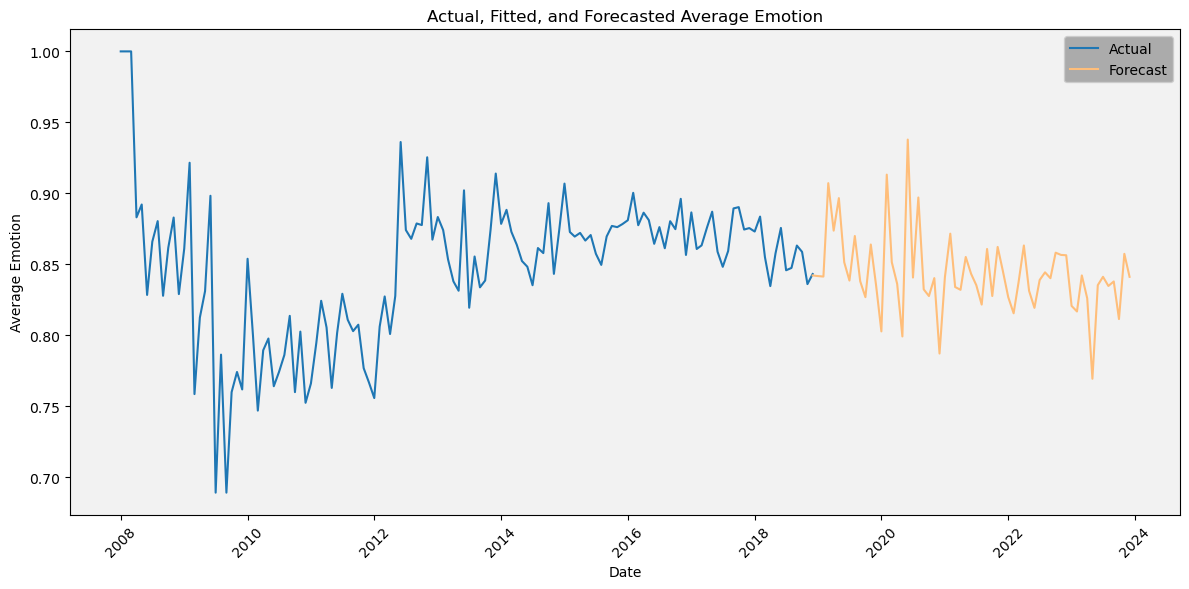

In [29]:
color3='#FFBE7A'
plt.rcParams['axes.facecolor'] = '#99999920'

plt.figure(figsize=(12, 6))
plt.plot(average['Date'], average['average'], label='Actual')
#plt.plot(average['Date'], fitted_values, label='Fitted')
plt.plot(forecast_dates, forecast_values, label='Forecast',color=color3)
plt.xlabel('Date')
plt.ylabel('Average Emotion')
plt.title('Actual, Fitted, and Forecasted Average Emotion')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

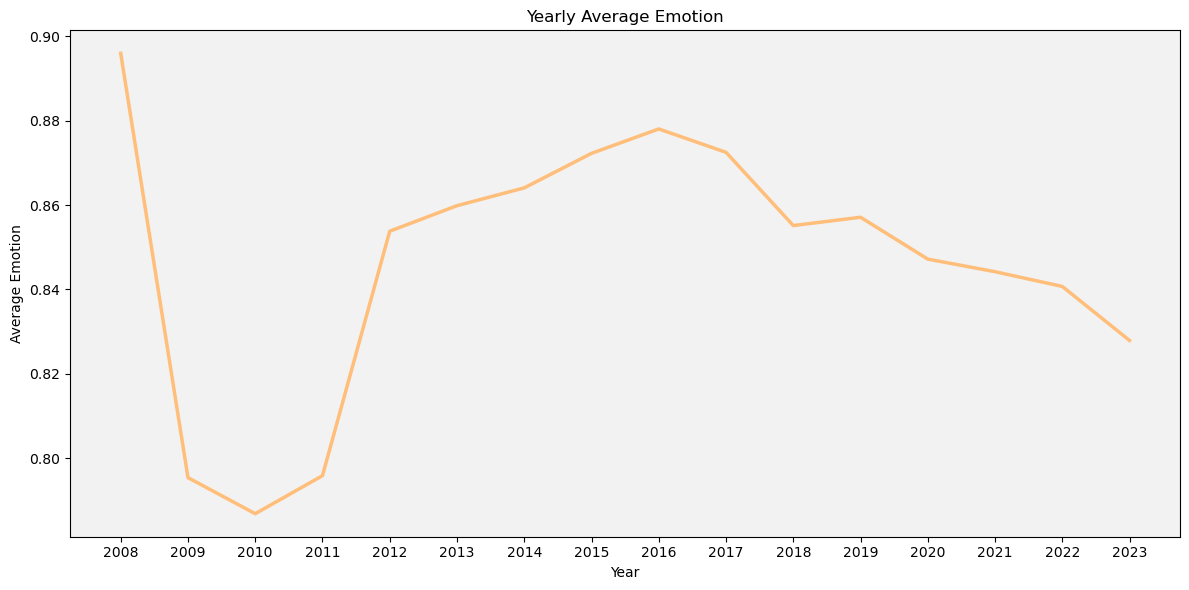

In [30]:

forecast_df = pd.DataFrame({'Date': forecast_dates, 'average': forecast_values})
combined_df = pd.concat([average, forecast_df], ignore_index=True)


combined_df['Year'] = combined_df['Date'].dt.year
yearly_average = combined_df.groupby('Year')['average'].mean().reset_index()

color3='#FFBE7A'
plt.rcParams['axes.facecolor'] = '#99999920'
plt.figure(figsize=(12, 6))
plt.plot(yearly_average['Year'], yearly_average['average'],color=color3,linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('Average Emotion')
plt.title('Yearly Average Emotion')
plt.xticks(yearly_average['Year'])
plt.tight_layout()
plt.show()